<a href="https://colab.research.google.com/github/5hv5hvnk/TabularPlaygroundSeries/blob/master/TPS_JULY_from_discusions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Working idea is from discussion forum by Mehran Kazeminia

In [ ]:
import numpy as np 
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

In [ ]:
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge

from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneGroupOut

In [ ]:
DF1 = pd.read_csv('train.csv')

DF2 = pd.read_csv('test.csv')

In [ ]:
MV1 = DF1.isnull().sum()
MV2 = DF2.isnull().sum()

print(f'Missing Value 1:  {MV1[MV1 > 0]}')
print(f'Missing Value 2:  {MV2[MV2 > 0]}')

Missing Value 1:  Series([], dtype: int64)
Missing Value 2:  Series([], dtype: int64)


In [ ]:
DF1

In [ ]:
DF2

In [ ]:
data1 = DF1.copy()
data2 = DF2.copy()

In [ ]:
type(data1)

pandas.core.frame.DataFrame

In [ ]:
X = data1.drop(columns = ['target_carbon_monoxide', 'target_benzene', 'target_nitrogen_oxides'])
X['date_time'] = X['date_time'].astype('datetime64[ns]').astype(np.int64)/10**9 
# converting date time into inteagers instead

X

,date_time,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5
0,1.268244e+09,13.1,46.0,0.7578,1387.2,1087.8,1056.0,1742.8,1293.4
1,1.268248e+09,13.2,45.3,0.7255,1279.1,888.2,1197.5,1449.9,1010.9
2,1.268251e+09,12.6,56.2,0.7502,1331.9,929.6,1060.2,1586.1,1117.0
3,1.268255e+09,11.0,62.4,0.7867,1321.0,929.0,1102.9,1536.5,1263.2
4,1.268258e+09,11.9,59.0,0.7888,1272.0,852.7,1180.9,1415.5,1132.2
...,...,...,...,...,...,...,...,...,...
7106,1.293826e+09,9.2,32.0,0.3871,1000.5,811.2,873.0,909.0,910.5
7107,1.293829e+09,9.1,33.2,0.3766,1022.7,790.0,951.6,912.9,903.4
7108,1.293833e+09,9.6,34.6,0.4310,1044.4,767.3,861.9,889.2,1159.1
7109,1.293836e+09,8.0,40.7,0.4085,952.8,691.9,908.5,917.0,1206.3


In [ ]:
XX = data2.copy()
XX['date_time'] = XX['date_time'].astype('datetime64[ns]').astype(np.int64)/10**9

XX

,date_time,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5
0,1.293840e+09,8.0,41.3,0.4375,1108.8,745.7,797.1,880.0,1273.1
1,1.293844e+09,5.1,51.7,0.4564,1249.5,864.9,687.9,972.8,1714.0
2,1.293847e+09,5.8,51.5,0.4689,1102.6,878.0,693.7,941.9,1300.8
3,1.293851e+09,5.0,52.3,0.4693,1139.7,916.2,725.6,1011.0,1283.0
4,1.293854e+09,4.5,57.5,0.4650,1022.4,838.5,871.5,967.0,1142.3
...,...,...,...,...,...,...,...,...,...
2242,1.301911e+09,23.2,28.7,0.7568,1340.3,1023.9,522.8,1374.0,1659.8
2243,1.301915e+09,24.5,22.5,0.7119,1232.8,955.1,616.1,1226.1,1269.0
2244,1.301918e+09,26.6,19.0,0.6406,1187.7,1052.4,572.8,1253.4,1081.1
2245,1.301922e+09,29.1,12.7,0.5139,1053.2,1009.0,702.0,1009.8,808.5


In [ ]:
y1 = data1.target_carbon_monoxide
y2 = data1.target_benzene
y3 = data1.target_nitrogen_oxides

In [ ]:
train_X, val_X, train_y1, val_y1 = train_test_split(X, y1, test_size=0.50, random_state=123)
train_X, val_X, train_y2, val_y2 = train_test_split(X, y2, test_size=0.50, random_state=123)
train_X, val_X, train_y3, val_y3 = train_test_split(X, y3, test_size=0.50, random_state=123)

In [ ]:
val_X.to_csv("val_X.csv",index=False)

val_y1.to_csv("val_y1.csv",index=False)
val_y2.to_csv("val_y2.csv",index=False)
val_y3.to_csv("val_y3.csv",index=False)

In [ ]:
model1v = XGBRegressor(max_depth=6,
                       n_estimators=250,
                       learning_rate=0.08,
                       subsample=0.7,
                       alpha=0.5,
                       random_state=123)                           
        
model1v.fit(train_X, train_y1, verbose=100)
oof_pred1 = model1v.predict(val_X)

oof_pred1 = np.clip(oof_pred1, 0.30, y1.max())
# oof_pred1 = np.clip(oof_pred1, y1.min(), y1.max())


print(mean_absolute_error(val_y1, oof_pred1))


[21:01:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.2565277456566775


In [ ]:
model1v.feature_importances_

array([0.02008379, 0.02037151, 0.00956916, 0.02451534, 0.13862899,
       0.70839185, 0.01844795, 0.01906173, 0.04092964], dtype=float32)

In [ ]:
model2v = XGBRegressor(max_depth=6,
                       n_estimators=400,
                       learning_rate=0.07,
                       subsample=0.7,
                       alpha=0.7,
                       random_state=123)          

model2v.fit(train_X, train_y2, verbose=100)
oof_pred2 = model2v.predict(val_X)

oof_pred2 = np.clip(oof_pred2, 0.10, y2.max())
# oof_pred2 = np.clip(oof_pred2, y1.max(), y2.max())


print(mean_absolute_error(val_y2, oof_pred2))


[21:02:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.7785313118123465


In [ ]:
model2v.feature_importances_

array([0.0025329 , 0.00285254, 0.00420071, 0.00445382, 0.00621554,
       0.94888216, 0.01229577, 0.01024676, 0.00831983], dtype=float32)

In [ ]:
model3v = XGBRegressor(max_depth=8,
                       n_estimators=500,
                       learning_rate=0.03,
                       subsample=0.7,
                       alpha=0.8,
                       random_state=123)                           

model3v.fit(train_X, train_y3, verbose=100)
oof_pred3 = model3v.predict(val_X)

oof_pred3 = np.clip(oof_pred3, 20.0, y3.max())
# oof_pred3 = np.clip(oof_pred3, y3.min(), y3.max())

print(mean_absolute_error(val_y3, oof_pred3))


[21:03:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
30.0980453375354


In [ ]:
model3v.feature_importances_

array([0.11007867, 0.01944414, 0.00962702, 0.02448037, 0.06818754,
       0.13019094, 0.5236489 , 0.0322852 , 0.08205726], dtype=float32)

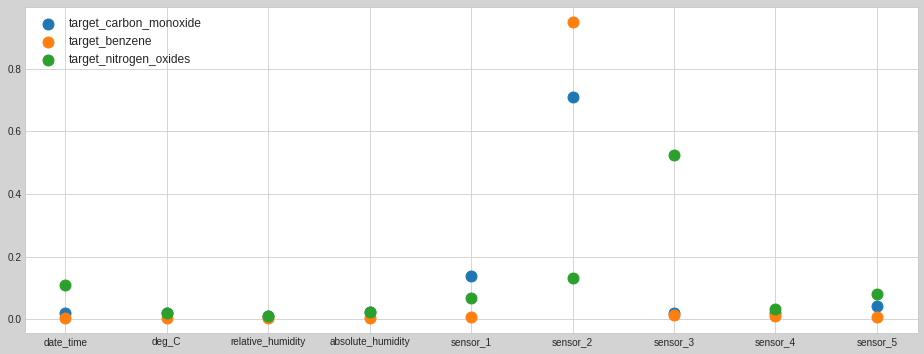

In [ ]:
axis_x  = X.columns.values
axis_y1 = model1v.feature_importances_
axis_y2 = model2v.feature_importances_
axis_y3 = model3v.feature_importances_

plt.style.use('seaborn-whitegrid') 
plt.figure(figsize=(16, 6), facecolor='lightgray')

plt.scatter(axis_x, axis_y1, s=120, label='target_carbon_monoxide') 
plt.scatter(axis_x, axis_y2, s=120, label='target_benzene')
plt.scatter(axis_x, axis_y3, s=120, label='target_nitrogen_oxides')
plt.legend(fontsize=12, loc=2)
plt.show() 

In [ ]:
model1 = XGBRegressor(max_depth=6,
                      n_estimators=250,
                      learning_rate=0.08,
                      subsample=0.7,
                      alpha=0.5,
                      random_state=314)                         

model1.fit(X, y1)
pred1 = model1.predict(XX)
pred1 = np.clip(pred1, 0.30, y1.max())
display(pred1, pred1.shape) 

[21:04:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


array([1.5508418, 2.0893478, 1.825534 , ..., 2.908093 , 2.8717349,
       2.8008597], dtype=float32)

(2247,)

In [ ]:
model2 = XGBRegressor(max_depth=6,                     
                      n_estimators=400,
                      learning_rate=0.07,
                      subsample=0.7,
                      alpha=0.7,
                      random_state=314)        

model2.fit(X, y2)
pred2 = model2.predict(XX)
pred2 = np.clip(pred2, 0.10, y2.max())
display(pred2, pred2.shape) 

[21:04:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


array([ 4.494129 ,  7.183673 ,  6.8831277, ..., 13.503233 , 11.191027 ,
       12.211569 ], dtype=float32)

(2247,)

In [ ]:
model3 = XGBRegressor(max_depth=8,
                      n_estimators=500,
                      learning_rate=0.03,
                      subsample=0.7,
                      alpha=0.8,
                      random_state=314)                           

model3.fit(X, y3)
pred3 = model3.predict(XX)
pred3 = np.clip(pred3, 20.0, y3.max())
display(pred3, pred3.shape) 

[21:04:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


array([199.67216, 295.51352, 279.70615, ..., 397.35828, 314.437  ,
       346.29074], dtype=float32)

(2247,)

In [ ]:
sample = pd.read_csv('sample_submission.csv')

In [ ]:
sub_xgb = sample.copy()

sub_xgb['target_carbon_monoxide'] = pred1
sub_xgb['target_benzene'] = pred2
sub_xgb['target_nitrogen_oxides'] = pred3
display(sub_xgb)

,date_time,target_carbon_monoxide,target_benzene,target_nitrogen_oxides
0,2011-01-01 00:00:00,1.550842,4.494129,199.672165
1,2011-01-01 01:00:00,2.089348,7.183673,295.513519
2,2011-01-01 02:00:00,1.825534,6.883128,279.706146
3,2011-01-01 03:00:00,1.942484,7.454803,308.440552
4,2011-01-01 04:00:00,1.290977,5.958952,226.199524
...,...,...,...,...
2242,2011-04-04 10:00:00,2.930804,13.457216,461.013245
2243,2011-04-04 11:00:00,2.381647,11.676653,344.353119
2244,2011-04-04 12:00:00,2.908093,13.503233,397.358276
2245,2011-04-04 13:00:00,2.871735,11.191027,314.437012


In [ ]:
sub = sub_xgb
sub.to_csv("submission_xgb.csv",index=False)

LeaveONEOUT

In [ ]:
months1 = []
for i in range(len(data1)):  
    
    row  = data1.iloc[i,0]    
    mon  = int(row[5:7])
    #day = int(row[8:10])
    #hou = int(row[11:13])    
    if (mon == 1): mon=12  
    months1.append(mon)   
    
data1['months'] = months1
display(data1)    

In [ ]:
months2 = []
for i in range(len(data2)):  
    
    row  = data2.iloc[i,0]    
    mon  = int(row[5:7])
    #day = int(row[8:10])
    #hou = int(row[11:13])  
    months2.append(mon)   
    
data2['months'] = months2
display(data2)   

,date_time,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,months
0,2011-01-01 00:00:00,8.0,41.3,0.4375,1108.8,745.7,797.1,880.0,1273.1,1
1,2011-01-01 01:00:00,5.1,51.7,0.4564,1249.5,864.9,687.9,972.8,1714.0,1
2,2011-01-01 02:00:00,5.8,51.5,0.4689,1102.6,878.0,693.7,941.9,1300.8,1
3,2011-01-01 03:00:00,5.0,52.3,0.4693,1139.7,916.2,725.6,1011.0,1283.0,1
4,2011-01-01 04:00:00,4.5,57.5,0.4650,1022.4,838.5,871.5,967.0,1142.3,1
...,...,...,...,...,...,...,...,...,...,...
2242,2011-04-04 10:00:00,23.2,28.7,0.7568,1340.3,1023.9,522.8,1374.0,1659.8,4
2243,2011-04-04 11:00:00,24.5,22.5,0.7119,1232.8,955.1,616.1,1226.1,1269.0,4
2244,2011-04-04 12:00:00,26.6,19.0,0.6406,1187.7,1052.4,572.8,1253.4,1081.1,4
2245,2011-04-04 13:00:00,29.1,12.7,0.5139,1053.2,1009.0,702.0,1009.8,808.5,4


In [ ]:
groups = data1['months']
display(groups)

0        3
1        3
2        3
3        3
4        3
        ..
7106    12
7107    12
7108    12
7109    12
7110    12
Name: months, Length: 7111, dtype: int64

In [ ]:
logo = LeaveOneGroupOut()

print(logo.get_n_splits(X, y1, groups))
print(logo.get_n_splits(X, y2, groups))
print(logo.get_n_splits(X, y3, groups))

10
10
10


In [ ]:
pred1_leave = np.zeros(len(XX))
for train_index, test_index in logo.split(X, y1, groups):

    X_train, X_test = X.iloc[train_index], X.iloc[test_index]   
    y_train, y_test = y1.iloc[train_index], y1.iloc[test_index]
    
    model1.fit(X_train, y_train.ravel())  
    pred1_leave += (model1.predict(XX)) / 10

display(pred1_leave, pred1_leave.shape) 

In [ ]:
pred2_leave = np.zeros(len(XX))
for train_index, test_index in logo.split(X, y2, groups):

    X_train, X_test = X.iloc[train_index], X.iloc[test_index]   
    y_train, y_test = y2.iloc[train_index], y2.iloc[test_index]
    
    model2.fit(X_train, y_train.ravel())  
    pred2_leave += (model2.predict(XX)) / 10

display(pred2_leave, pred2_leave.shape) 

In [ ]:
pred3_leave = np.zeros(len(XX))
for train_index, test_index in logo.split(X, y3, groups):

    X_train, X_test = X.iloc[train_index], X.iloc[test_index]   
    y_train, y_test = y3.iloc[train_index], y3.iloc[test_index]
    
    model3.fit(X_train, y_train.ravel())  
    pred3_leave += (model3.predict(XX)) / 10

display(pred3_leave, pred3_leave.shape) 

[21:14:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:14:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:14:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:14:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:14:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:15:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:15:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:15:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

array([203.00387001, 297.23854065, 285.87425995, ..., 383.58073425,
       326.06926155, 338.91341972])

(2247,)

In [ ]:
sub_leave = sample.copy()

sub_leave['target_carbon_monoxide'] = pred1_leave
sub_leave['target_benzene'] = pred2_leave
sub_leave['target_nitrogen_oxides'] = pred3_leave
display(sub_leave)

In [ ]:
sub = sub_leave
sub.to_csv("submission_leave.csv",index=False)

TIME SERIES CV


In [55]:
from sklearn.model_selection import TimeSeriesSplit as tss

In [56]:
tscv = tss()

In [57]:
tscv

TimeSeriesSplit(max_train_size=None, n_splits=5)

In [68]:
tscv.split(X, y1, groups)
tscv.split([X, y2, groups])
tscv.split([X, y3, groups])


<generator object TimeSeriesSplit.split at 0x7fce10741d50>

In [70]:
pred1_tscv = np.zeros(len(XX))
for train_index, test_index in tscv.split(X, y1, groups):

    X_train, X_test = X.iloc[train_index], X.iloc[test_index]   
    y_train, y_test = y1.iloc[train_index], y1.iloc[test_index]
    
    model1.fit(X_train, y_train.ravel())  
    pred1_tscv += (model1.predict(XX)) / 10

display(pred1_tscv, pred1_tscv.shape) 

[23:04:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:04:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:04:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:04:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:04:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


array([0.75028746, 0.98386928, 0.89108203, ..., 1.37230536, 1.06167485,
       1.12134278])

(2247,)

In [71]:
pred2_tscv = np.zeros(len(XX))
for train_index, test_index in logo.split(X, y2, groups):

    X_train, X_test = X.iloc[train_index], X.iloc[test_index]   
    y_train, y_test = y2.iloc[train_index], y2.iloc[test_index]
    
    model2.fit(X_train, y_train.ravel())  
    pred2_tscv  += (model2.predict(XX)) / 10

display(pred2_tscv , pred2_tscv .shape) 

[23:05:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:05:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:05:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:05:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:05:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:05:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:05:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:05:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

array([ 4.72791067,  7.18365133,  7.10326493, ..., 13.19602597,
       10.8327142 , 12.0535723 ])

(2247,)

In [72]:
pred3_tscv = np.zeros(len(XX))
for train_index, test_index in logo.split(X, y3, groups):

    X_train, X_test = X.iloc[train_index], X.iloc[test_index]   
    y_train, y_test = y3.iloc[train_index], y3.iloc[test_index]
    
    model3.fit(X_train, y_train.ravel())  
    pred3_tscv += (model3.predict(XX)) / 10

display(pred3_tscv, pred3_leave.shape) 

[23:05:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:06:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:06:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:06:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:06:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:06:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:06:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:06:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

array([203.00387001, 297.23854065, 285.87425995, ..., 383.58073425,
       326.06926155, 338.91341972])

(2247,)

In [73]:
sub_tscv = sample.copy()

sub_tscv['target_carbon_monoxide'] = pred1_tscv
sub_tscv['target_benzene'] = pred2_tscv
sub_tscv['target_nitrogen_oxides'] = pred3_tscv
display(sub_tscv)

,date_time,target_carbon_monoxide,target_benzene,target_nitrogen_oxides
0,2011-01-01 00:00:00,0.750287,4.727911,203.003870
1,2011-01-01 01:00:00,0.983869,7.183651,297.238541
2,2011-01-01 02:00:00,0.891082,7.103265,285.874260
3,2011-01-01 03:00:00,0.980224,7.830874,303.759182
4,2011-01-01 04:00:00,0.649112,6.152841,227.904964
...,...,...,...,...
2242,2011-04-04 10:00:00,1.314575,13.103151,443.846031
2243,2011-04-04 11:00:00,1.268027,11.434096,351.244156
2244,2011-04-04 12:00:00,1.372305,13.196026,383.580734
2245,2011-04-04 13:00:00,1.061675,10.832714,326.069262


In [74]:
sub = sub_tscv
sub.to_csv("submission_tscv.csv",index=False)